In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training data
full_data = np.loadtxt('wine/wine.data.txt', delimiter=',')

# Get the labels (wine classes)
train_labels = full_data[:, 0]

# Get the features
train_data = full_data[:, 1:]


In [9]:
# 1-NN Classifier with Leave-One-Out Cross-Validation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def LOOCV():
    """
    Performs leave-one-out cross-validation for a 1-NN classifier.
    Returns a list of (true_label, predicted_label) tuples.
    """
    predictions = []
    for i in range(len(train_labels)):
        x = train_data[i,]
        y_true = train_labels[i]
        
        # Leave one out
        train_data_loo = np.delete(train_data, i, axis=0)
        train_labels_loo = np.delete(train_labels, i, axis=0)
        
        # Find nearest neighbor
        distances = [euclidean_distance(x, train_data_loo[j,]) for j in range(len(train_labels_loo))]
        nn_index = np.argmin(distances)
        y_pred = train_labels_loo[nn_index]

        predictions.append((y_true, y_pred))

    return predictions

In [10]:
def calculate_accuracy(predictions):
    """
    Calculates accuracy based on a list of (true, predicted) labels.
    """
    correct = sum(1 for y_true, y_pred in predictions if y_true == y_pred)
    return correct / len(predictions)

def calculate_confusion_matrix(predictions):
    """
    Calculates a 3x3 confusion matrix from a list of (true, predicted) labels.
    """
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for y_true, y_pred in predictions:
        true_idx = int(y_true) - 1
        pred_idx = int(y_pred) - 1
        confusion_matrix[true_idx, pred_idx] += 1
    return confusion_matrix

In [11]:
predictions = LOOCV()
accuracy = calculate_accuracy(predictions)
error = 1 - accuracy
confusion_matrix = calculate_confusion_matrix(predictions)

print("Accuracy of LOOCV: ", accuracy, "\n")
print("Error of LOOCV: ", error, "\n")

print("Confusion Matrix of LOOCV:")
print(confusion_matrix)

Accuracy of LOOCV:  0.7696629213483146 

Error of LOOCV:  0.2303370786516854 

Confusion Matrix of LOOCV:
[[52  3  4]
 [ 5 54 12]
 [ 3 14 31]]


In [12]:
# k-fold Cross-Validation
def k_fold_CV(k):
    """
    Performs k-fold cross-validation for a 1-NN classifier.
    Returns a list of (true_label, predicted_label) tuples.
    """
    fold_size = len(train_labels) // k
    predictions = []

    for fold in range(k):
        start = fold * fold_size
        end = (fold + 1) * fold_size if fold != k - 1 else len(train_labels)

        x_val = train_data[start:end,]
        y_val = train_labels[start:end]

        x_train = np.delete(train_data, slice(start, end), axis=0)
        y_train = np.delete(train_labels, slice(start, end), axis=0)

        for i in range(len(y_val)):
            x = x_val[i,]
            y_true = y_val[i]

            distances = [euclidean_distance(x, x_train[j,]) for j in range(len(y_train))]
            nn_index = np.argmin(distances)
            y_pred = y_train[nn_index]

            predictions.append((y_true, y_pred))

    return predictions

k = 2, Accuracy = 0.3315
k = 7, Accuracy = 0.6573
k = 12, Accuracy = 0.7079
k = 17, Accuracy = 0.7135
k = 22, Accuracy = 0.7191
k = 27, Accuracy = 0.7191
k = 32, Accuracy = 0.7135
k = 38, Accuracy = 0.7079
k = 43, Accuracy = 0.7360
k = 48, Accuracy = 0.6910
k = 53, Accuracy = 0.7191
k = 58, Accuracy = 0.7584
k = 63, Accuracy = 0.6011
k = 69, Accuracy = 0.6629
k = 74, Accuracy = 0.6910
k = 79, Accuracy = 0.7191
k = 84, Accuracy = 0.7472
k = 89, Accuracy = 0.7697
k = 94, Accuracy = 0.6292
k = 100, Accuracy = 0.6180


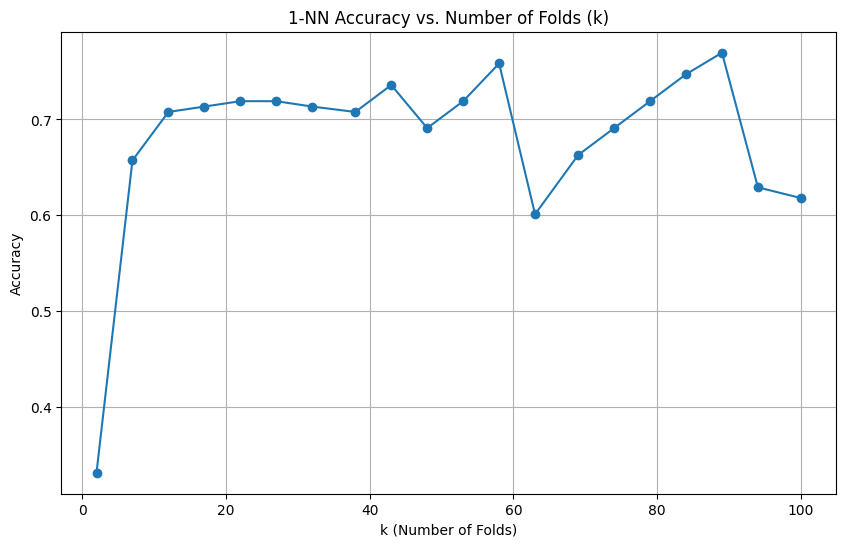

In [13]:
# Choose 20 different values for k, spread out from 2 to 100
k_values = np.linspace(2, 100, 20, dtype=int)
accuracies = []

# Loop through each k, run cross-validation, and store the accuracy
for k in k_values:
    # Get the list of (true_label, predicted_label)
    predictions = k_fold_CV(k)
    
    # Calculate accuracy
    accuracy = calculate_accuracy(predictions)
    
    # Store the result
    accuracies.append(accuracy)
    
    # Print progress
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('1-NN Accuracy vs. Number of Folds (k)')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
def LOOCV_normalized():
    """
    Performs LOOCV for a 1-NN classifier with feature normalization.
    Returns a list of (true_label, predicted_label) tuples.
    """
    predictions = []
    for i in range(len(train_labels)):
        # The point to be classified (our validation set for this fold)
        x_val = train_data[i,]
        y_true = train_labels[i]
        
        # The rest of the data is our training set for this fold
        x_train = np.delete(train_data, i, axis=0)
        y_train = np.delete(train_labels, i, axis=0)
        
        # 1. Normalize the data based on the TRAINING set
        min_vals = np.min(x_train, axis=0)
        max_vals = np.max(x_train, axis=0)
        
        # Avoid division by zero if a feature has the same value for all points
        range_vals = max_vals - min_vals
        range_vals[range_vals == 0] = 1 
        
        # Apply normalization to both training and validation sets
        x_train_norm = (x_train - min_vals) / range_vals
        x_val_norm = (x_val - min_vals) / range_vals

        # 2. Find the nearest neighbor using the normalized data
        distances = [euclidean_distance(x_val_norm, x_train_norm[j,]) for j in range(len(y_train))]
        nn_index = np.argmin(distances)
        y_pred = y_train[nn_index]

        predictions.append((y_true, y_pred))

    return predictions

In [15]:
predictions_norm = LOOCV_normalized()

accuracy_norm = calculate_accuracy(predictions_norm)
confusion_matrix_norm = calculate_confusion_matrix(predictions_norm)

print("Accuracy with Normalization:", accuracy_norm, "\n")
print("Confusion Matrix with Normalization:")
print(confusion_matrix_norm)

Accuracy with Normalization: 0.949438202247191 

Confusion Matrix with Normalization:
[[59  0  0]
 [ 5 62  4]
 [ 0  0 48]]
